# 1.Introduction
In this notebook, we will dive deep into the intriguing world of crab farming. It is a popular and economically rewarding activity, especially in coastal regions, with lower labor and production costs, quick growth, and a large market for consumption. But, to achieve an optimum balance between cost and profit, one crucial element that farmers need to estimate accurately is the age of the crab. Precise age determination aids in knowing the right time to harvest the crabs, ensuring the best utilization of resources.

## 1.1. Problem Summary
The main problem we are addressing is predicting the age of the crab based on its physical attributes. This regression problem, given its real-world implications and the need for precise results, calls for a comprehensive exploratory data analysis (EDA), adept feature engineering, and robust regression modeling.

## 1.2. Dataset
The dataset we have contains a total of 74051 observations across several physical characteristics of crabs. Each observation is an individual crab with features like:

- Sex
- Length (in feet)
- Diameter (in feet)
- Height (in feet)
- Weight (in ounces)
- Shucked Weight (Weight without the shell, in ounces)
- Viscera Weight (Weight of the abdominal organs, in ounces)
- Shell Weight (in ounces)
- Age (in months)
  
The data seems to be clean without any missing or mismatched values. A preliminary overview shows a diverse set of values across different features, hinting at potential patterns and correlations that could be instrumental in our modeling.

Here are some characteristics and behaviors of crabs that might be relevant for feature engineering:

- _Growth and Moulting_: Crabs grow through a process called moulting, which is when they shed their previous shell and grow a new one. The frequency and timing of moulting can be related to the crab's age. For example, younger crabs moult more frequently than adult ones. If you have data on moult frequency or shell weight ratio (which might indicate when the last moult occurred), this could be useful.

- _Sex and Reproduction_: Growth patterns can vary between male and female crabs, especially in relation to reproduction. For example, females may stop growing when they start reproducing, whereas males may continue to grow for longer. Therefore, the sex of the crab could be a significant factor in predicting its age.

## 1.3.Feature Characteristics
A brief overview of the feature characteristics is as follows:

- Sex: The dataset is almost evenly split across the three categories: Male (37%), Female (32%), and Indeterminate (31%).
- Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, and Shell Weight: These features showcase a range of values, with different means, standard deviations, and quantiles. A more in-depth analysis will help in understanding their distributions and potential impact on the age of the crab.
- Age: The age of the crab ranges from 1 month to 29 months, with a mean of approximately 9.95 months. The data skews towards younger crabs, with a significant number of crabs aged between 6.60 to 12.20 months.

## 1.4.Methodology
The methodology for this analysis will consist of the following stages:

- Exploratory Data Analysis (EDA): The aim here is to understand the distribution of data, correlations between different features, and detect any potential outliers or anomalies.

- Feature Engineering: This stage involves generating new features that might help improve the model's accuracy. These can be combinations of existing features or transformations.

- Model Building: We will try out various regression models like Linear Regression, Decision Trees, Random Forests, SVM, etc., to predict the age of the crab.

- Model Evaluation: Evaluate the model using appropriate metrics and error analysis to see how well our model is performing.

- Model Tuning: This includes tuning hyperparameters for better performance and applying techniques like cross-validation to avoid overfitting.

The above process will be iteratively performed until we arrive at a satisfactory model for predicting the age of the crab.

# Data processing

## Import and basic analysis

In [35]:
import pandas as pd

X_train = pd.read_csv('input/train.csv')
X_original = pd.read_csv('input/CrabAgePrediction.csv')
X_test = pd.read_csv('input/test.csv')

id_test = X_test['id']

In [36]:
# Shape of the data
print('Shape of the training data: ', X_train.shape)
print('Shape of the original data: ', X_original.shape)
print('Shape of the testing data: ', X_test.shape)

Shape of the training data:  (74051, 10)
Shape of the original data:  (3893, 9)
Shape of the testing data:  (49368, 9)


In [37]:
X_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [38]:
X_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [39]:
X_original.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [41]:
X_train.drop(['id'], axis=1, inplace=True)
X_test.drop(['id'], axis=1, inplace=True)

In [42]:
#X_train = pd.concat([X_train, X_original], axis=0)

# EDA

## Previous transformations: OHE for 'Sex' feature

In [43]:
# One Hot enconding of sex feature of X_train
X_train = pd.concat([X_train, pd.get_dummies(X_train['Sex'], prefix='Sex')], axis=1)
X_train.drop('Sex', axis=1, inplace=True)

# One Hot enconding of sex feature of X_test
X_test = pd.concat([X_test, pd.get_dummies(X_test['Sex'], prefix='Sex')], axis=1)
X_test.drop('Sex', axis=1, inplace=True)

In [44]:
# Bollean features to int
X_train['Sex_F'] = X_train['Sex_F'].astype(int)
X_train['Sex_M'] = X_train['Sex_M'].astype(int)
X_train['Sex_I'] = X_train['Sex_I'].astype(int)

# The same for the test data   
X_test['Sex_F'] = X_test['Sex_F'].astype(int)
X_test['Sex_M'] = X_test['Sex_M'].astype(int)
X_test['Sex_I'] = X_test['Sex_I'].astype(int)

## EDA - Exploratory Data Analysis

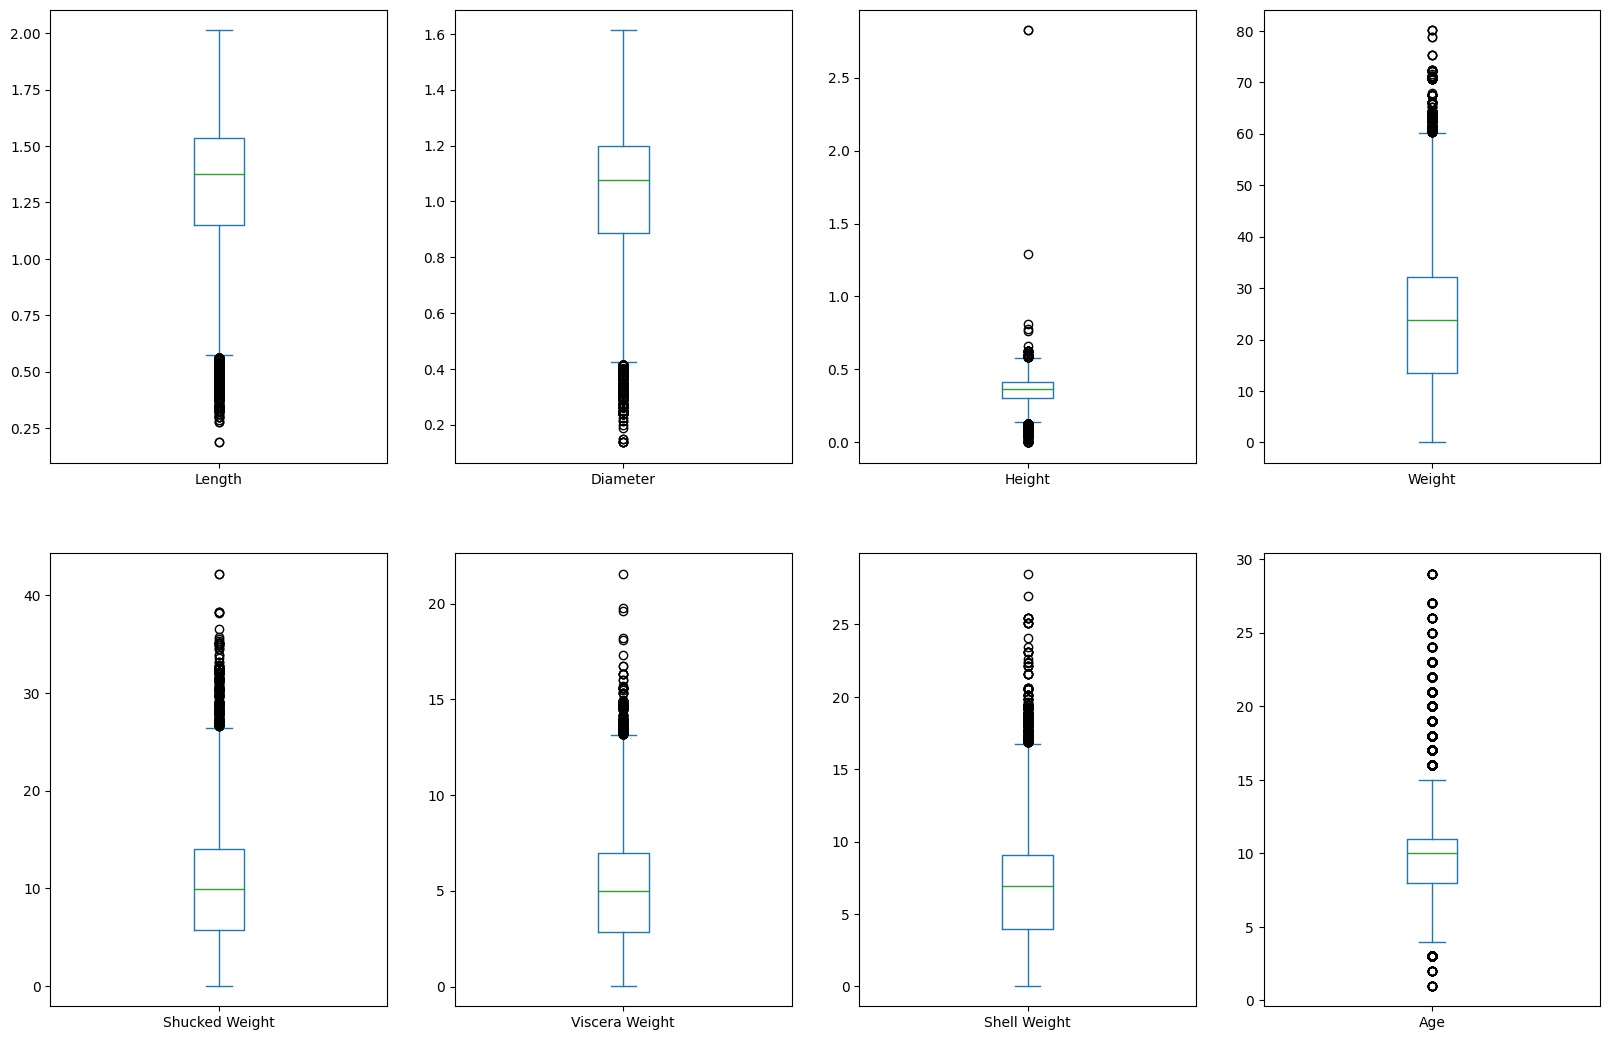

In [45]:
import matplotlib.pyplot as plt

# Individuals boxplot for each feature of the training data without id column
X_train.iloc[:,:-3].plot(kind='box', subplots=True, layout=(3, 4), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

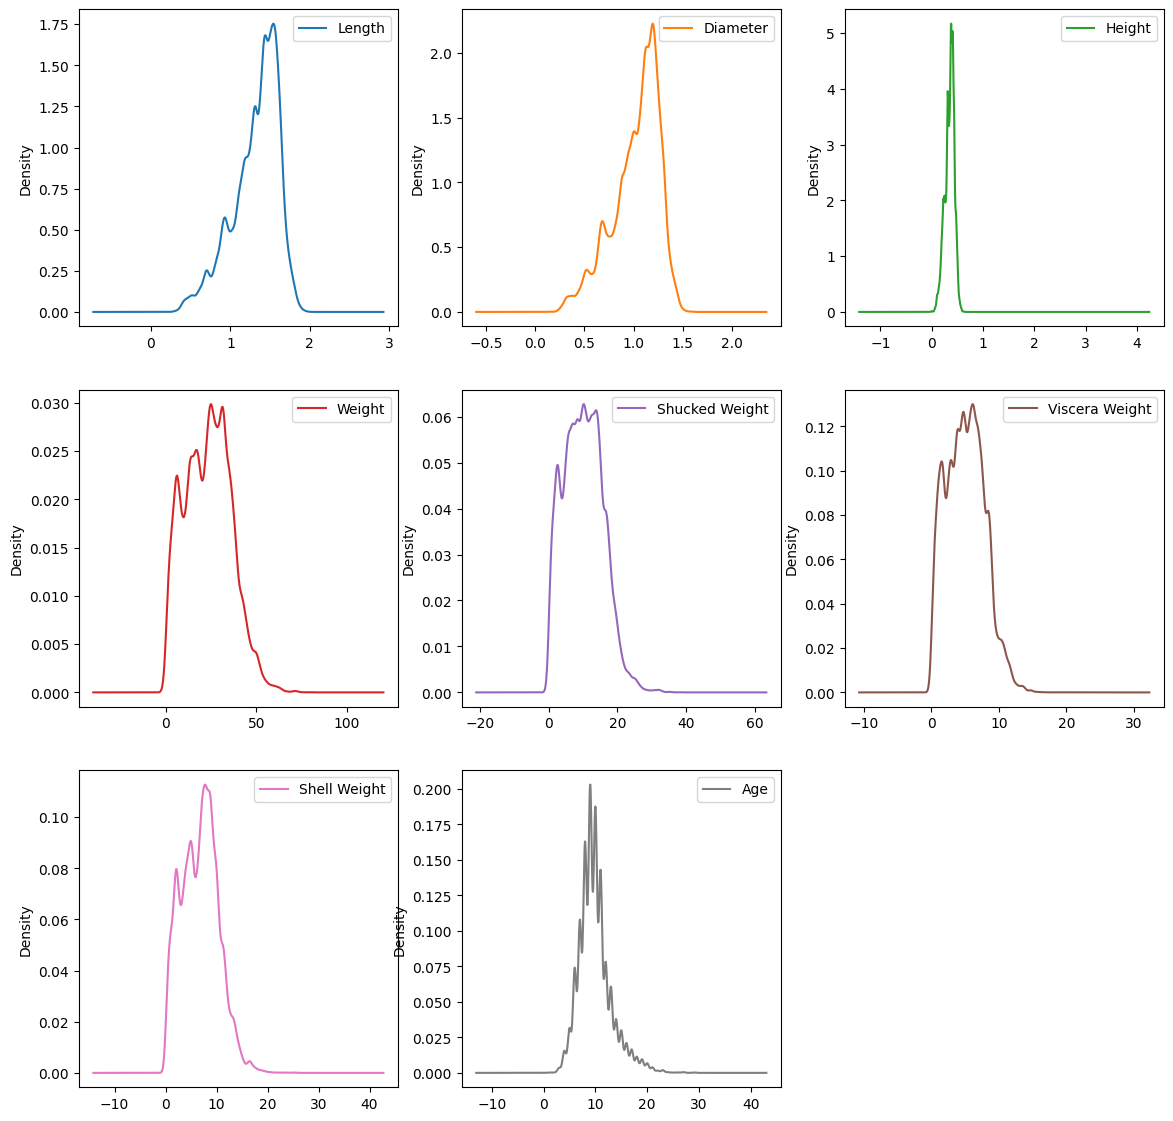

In [46]:
# Density function for each feature of the training data without id column
X_train.iloc[:,:-3].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

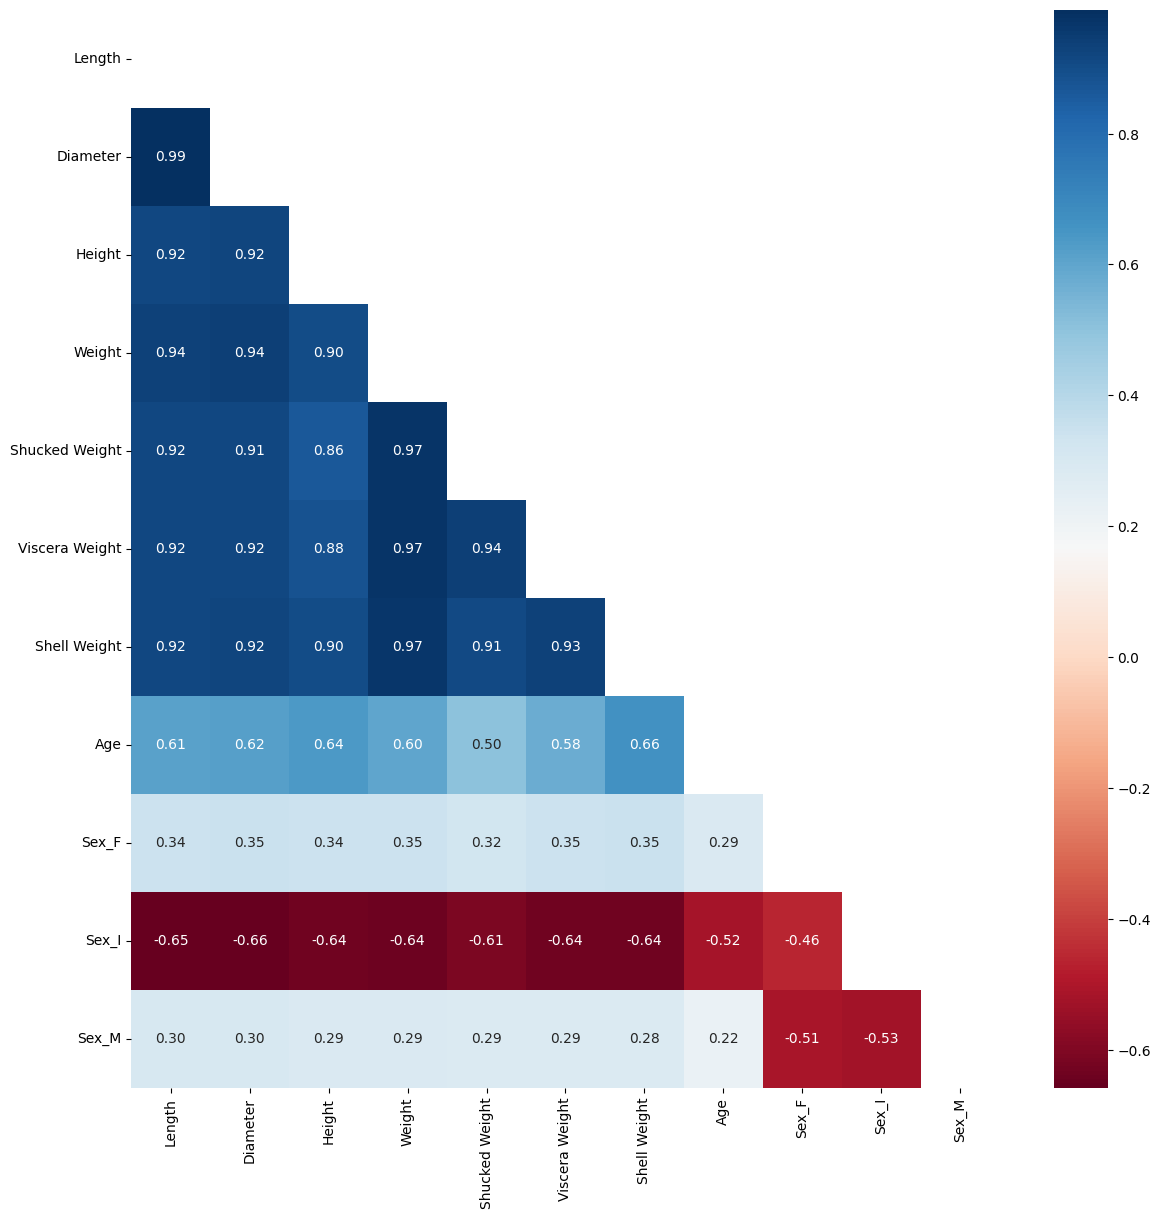

In [47]:
# Correlation matrix for the training data with only inferior triangle
import seaborn as sns
import numpy as np

corr = X_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

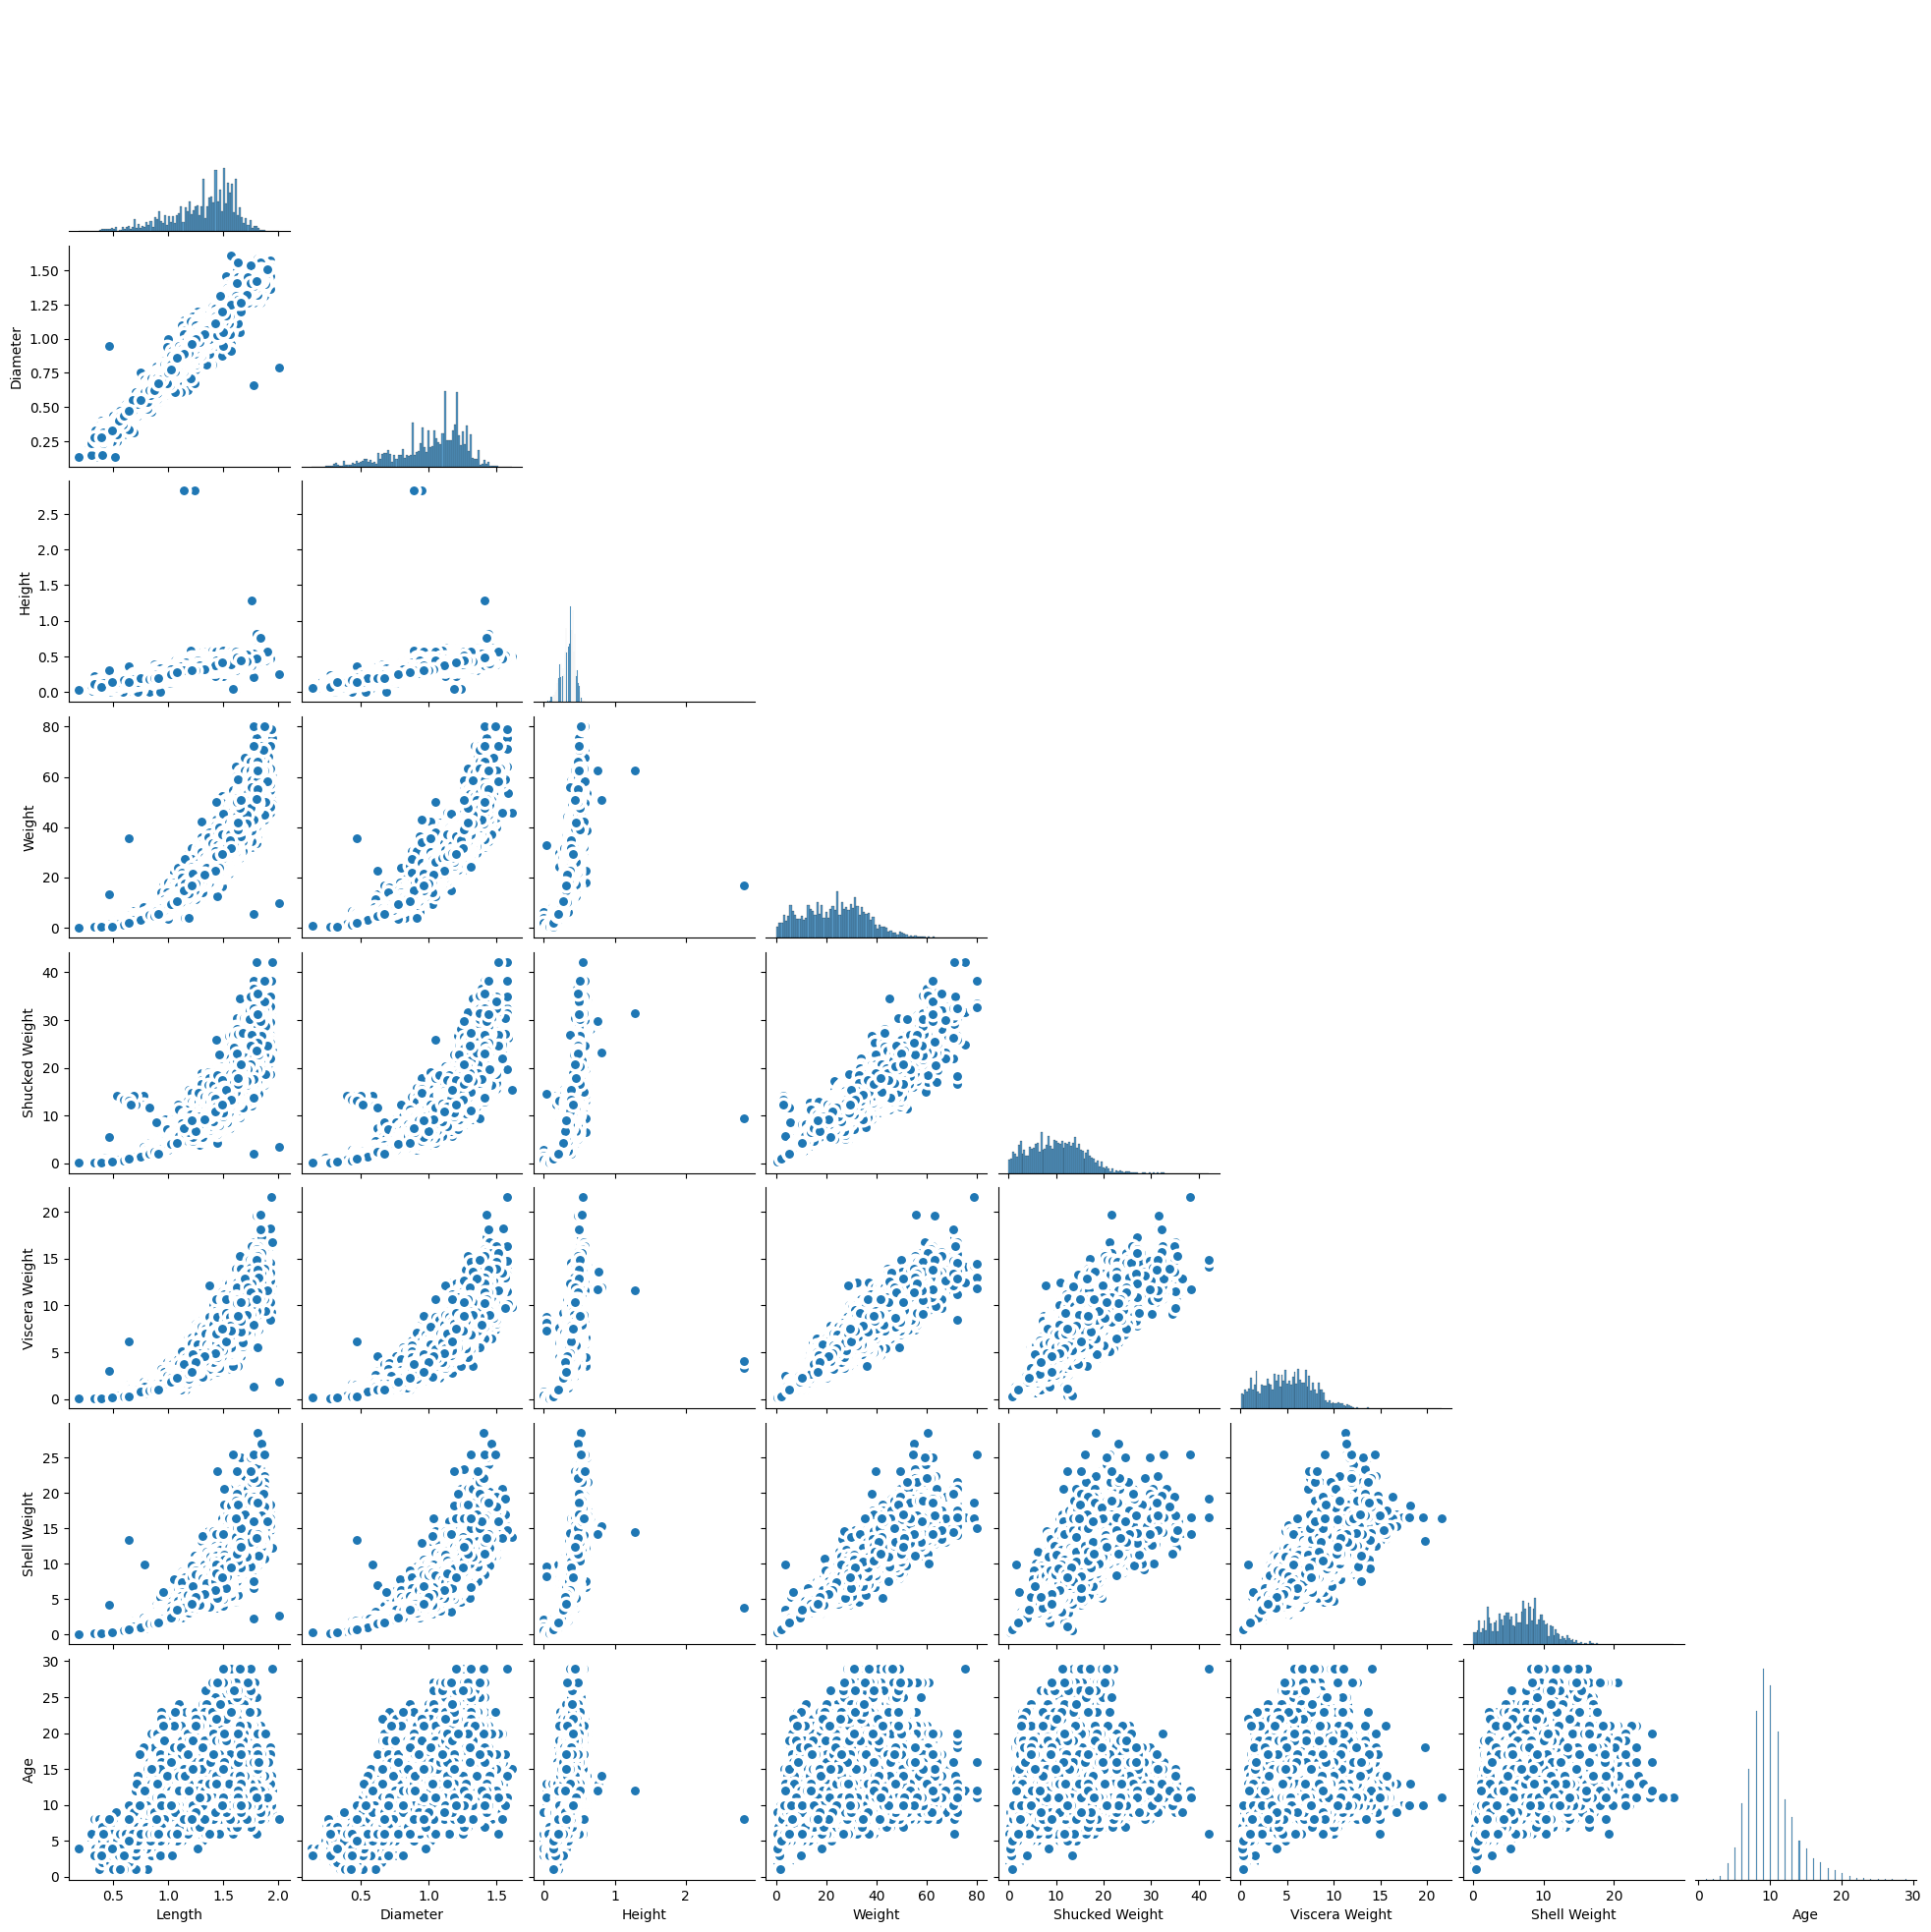

In [48]:
import seaborn as sns

# matrix of scatter and histograms for each feature of the training data 
sns.pairplot(data=X_train.iloc[:,:-3], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()

### Missing values

In [49]:
# Table with the number of missing values for each feature or nan values
X_train.isnull().sum()

Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

### Null values

In [50]:
# Quantity of 0 values in the 'Height' column
print(X_train['Height'].isin([0]).value_counts())
print(X_test['Height'].isin([0]).value_counts())

Height
False    74027
True        24
Name: count, dtype: int64
Height
False    49354
True        14
Name: count, dtype: int64


In [51]:
"""from sklearn.ensemble import RandomForestRegressor

# Loop over all features with 0 values to impute them with a random forest regressor
for feature in X_train.columns:
    if feature != 'Age' and (X_train[feature].isin([0]).any() or X_test[feature].isin([0]).any()):
        train = X_train.dropna(subset=[feature]) # Drop nan values
        impute_train = X_train.loc[X_train[feature].isin([0])]    # Data to impute in train set
        impute_test = X_test.loc[X_test[feature].isin([0])]    # Data to impute in test set
 
        X_train_feature = train.drop([feature, 'Age'], axis=1) # Drop feature to impute and target
        y_train_feature = train[feature] # Feature to impute
        X_impute_train_feature = impute_train.drop([feature, 'Age'], axis=1)
        X_impute_test_feature = impute_test.drop(feature, axis=1)

        model = RandomForestRegressor(n_estimators=100, random_state=0)
        model.fit(X_train_feature, y_train_feature)

        imputed_values_train = model.predict(X_impute_train_feature)
        imputed_values_test = model.predict(X_impute_test_feature)

        X_train.loc[X_train[feature].isin([0]), feature] = imputed_values_train
        X_test.loc[X_test[feature].isin([0]), feature] = imputed_values_test
"""


"from sklearn.ensemble import RandomForestRegressor\n\n# Loop over all features with 0 values to impute them with a random forest regressor\nfor feature in X_train.columns:\n    if feature != 'Age' and (X_train[feature].isin([0]).any() or X_test[feature].isin([0]).any()):\n        train = X_train.dropna(subset=[feature]) # Drop nan values\n        impute_train = X_train.loc[X_train[feature].isin([0])]    # Data to impute in train set\n        impute_test = X_test.loc[X_test[feature].isin([0])]    # Data to impute in test set\n \n        X_train_feature = train.drop([feature, 'Age'], axis=1) # Drop feature to impute and target\n        y_train_feature = train[feature] # Feature to impute\n        X_impute_train_feature = impute_train.drop([feature, 'Age'], axis=1)\n        X_impute_test_feature = impute_test.drop(feature, axis=1)\n\n        model = RandomForestRegressor(n_estimators=100, random_state=0)\n        model.fit(X_train_feature, y_train_feature)\n\n        imputed_values_train

In [52]:
# Quantity of 0 values in the 'Height' column
print(X_train['Height'].isin([0]).value_counts())
print(X_test['Height'].isin([0]).value_counts())


Height
False    74027
True        24
Name: count, dtype: int64
Height
False    49354
True        14
Name: count, dtype: int64


In [53]:
X_test.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
2,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
3,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
4,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0


## Feature engineering 

In [54]:
X_train_FE = pd.DataFrame(X_train)
X_test_FE = pd.DataFrame(X_test)

In [55]:
# Log10 of weight features
X_train_FE['LogWeight'] = np.log10(X_train_FE['Weight'])
X_train_FE['LogShuckedWeight'] = np.log10(X_train_FE['Shucked Weight'])
X_train_FE['LogVisceraWeight'] = np.log10(X_train_FE['Viscera Weight'])
X_train_FE['LogShellWeight'] = np.log10(X_train_FE['Shell Weight'])

X_test_FE['LogWeight'] = np.log10(X_test_FE['Weight'])
X_test_FE['LogShuckedWeight'] = np.log10(X_test_FE['Shucked Weight'])
X_test_FE['LogVisceraWeight'] = np.log10(X_test_FE['Viscera Weight'])
X_test_FE['LogShellWeight'] = np.log10(X_test_FE['Shell Weight'])

drop_features = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
X_train_FE.drop(drop_features, axis=1, inplace=True)
X_test_FE.drop(drop_features, axis=1, inplace=True)


### Dimension ratios

In [22]:
"""X_train_FE['Relation_DL'] = X_train_FE['Diameter'] / X_train_FE['Length'] 
X_train_FE['Relation_HL'] = X_train_FE['Height'] / X_train_FE['Length'] 
X_train_FE['Relation_HD'] = X_train_FE['Height'] / X_train_FE['Diameter']

# The same for the test data
X_test_FE['Relation_DL'] = X_test_FE['Diameter'] / X_test_FE['Length']
X_test_FE['Relation_HL'] = X_test_FE['Height'] / X_test_FE['Length']
X_test_FE['Relation_HD'] = X_test_FE['Height'] / X_test_FE['Diameter']"""

"X_train_FE['Relation_DL'] = X_train_FE['Diameter'] / X_train_FE['Length'] \nX_train_FE['Relation_HL'] = X_train_FE['Height'] / X_train_FE['Length'] \nX_train_FE['Relation_HD'] = X_train_FE['Height'] / X_train_FE['Diameter']\n\n# The same for the test data\nX_test_FE['Relation_DL'] = X_test_FE['Diameter'] / X_test_FE['Length']\nX_test_FE['Relation_HL'] = X_test_FE['Height'] / X_test_FE['Length']\nX_test_FE['Relation_HD'] = X_test_FE['Height'] / X_test_FE['Diameter']"

### Density

In [23]:
# importar el numero pi
import numpy as np

"""# We suppose the crab as a elllipsoid
X_train_FE['Volume'] = (4/3)*np.pi*(X_train_FE['Diameter'] * X_train_FE['Length'] * X_train_FE['Height'])/16
X_train_FE['Density'] = X_train_FE['Weight'] / X_train_FE['Volume']

X_test_FE['Volume'] = (4/3)*np.pi*(X_test_FE['Diameter'] * X_test_FE['Length'] * X_test_FE['Height'])/16
X_test_FE['Density'] = X_test_FE['Weight'] / X_test_FE['Volume']
"""

"# We suppose the crab as a elllipsoid\nX_train_FE['Volume'] = (4/3)*np.pi*(X_train_FE['Diameter'] * X_train_FE['Length'] * X_train_FE['Height'])/16\nX_train_FE['Density'] = X_train_FE['Weight'] / X_train_FE['Volume']\n\nX_test_FE['Volume'] = (4/3)*np.pi*(X_test_FE['Diameter'] * X_test_FE['Length'] * X_test_FE['Height'])/16\nX_test_FE['Density'] = X_test_FE['Weight'] / X_test_FE['Volume']\n"

### Weight proportions

In [24]:
"""X_train_FE['Ratio_ShuWei'] = X_train_FE['Shucked Weight'] / X_train_FE['Weight']
X_train_FE['Ratio_VisWei'] = X_train_FE['Viscera Weight'] / X_train_FE['Weight']
X_train_FE['Ratio_SheWei'] = X_train_FE['Shell Weight'] / X_train_FE['Weight']

X_test_FE['Ratio_ShuWei'] = X_test_FE['Shucked Weight'] / X_test_FE['Weight']
X_test_FE['Ratio_VisWei'] = X_test_FE['Viscera Weight'] / X_test_FE['Weight']
X_test_FE['Ratio_SheWei'] = X_test_FE['Shell Weight'] / X_test_FE['Weight']"""

"X_train_FE['Ratio_ShuWei'] = X_train_FE['Shucked Weight'] / X_train_FE['Weight']\nX_train_FE['Ratio_VisWei'] = X_train_FE['Viscera Weight'] / X_train_FE['Weight']\nX_train_FE['Ratio_SheWei'] = X_train_FE['Shell Weight'] / X_train_FE['Weight']\n\nX_test_FE['Ratio_ShuWei'] = X_test_FE['Shucked Weight'] / X_test_FE['Weight']\nX_test_FE['Ratio_VisWei'] = X_test_FE['Viscera Weight'] / X_test_FE['Weight']\nX_test_FE['Ratio_SheWei'] = X_test_FE['Shell Weight'] / X_test_FE['Weight']"

In [25]:
X_train_FE.head()

,Length,Diameter,Height,Age,Sex_F,Sex_I,Sex_M,LogWeight,LogShuckedWeight,LogVisceraWeight,LogShellWeight
0,1.5250,1.1750,0.3750,9,0,1,0,1.461996,1.104792,0.822688,0.921631
1,1.1000,0.8250,0.2750,8,0,1,0,1.017803,0.655306,0.366359,0.531727
2,1.3875,1.1125,0.3750,9,0,0,1,1.394057,1.054605,0.744801,0.823613
3,1.7000,1.4125,0.5000,11,1,0,0,1.704670,1.308670,1.041070,1.176001
4,1.2500,1.0125,0.3375,8,0,1,0,1.367153,1.078372,0.653943,0.774765


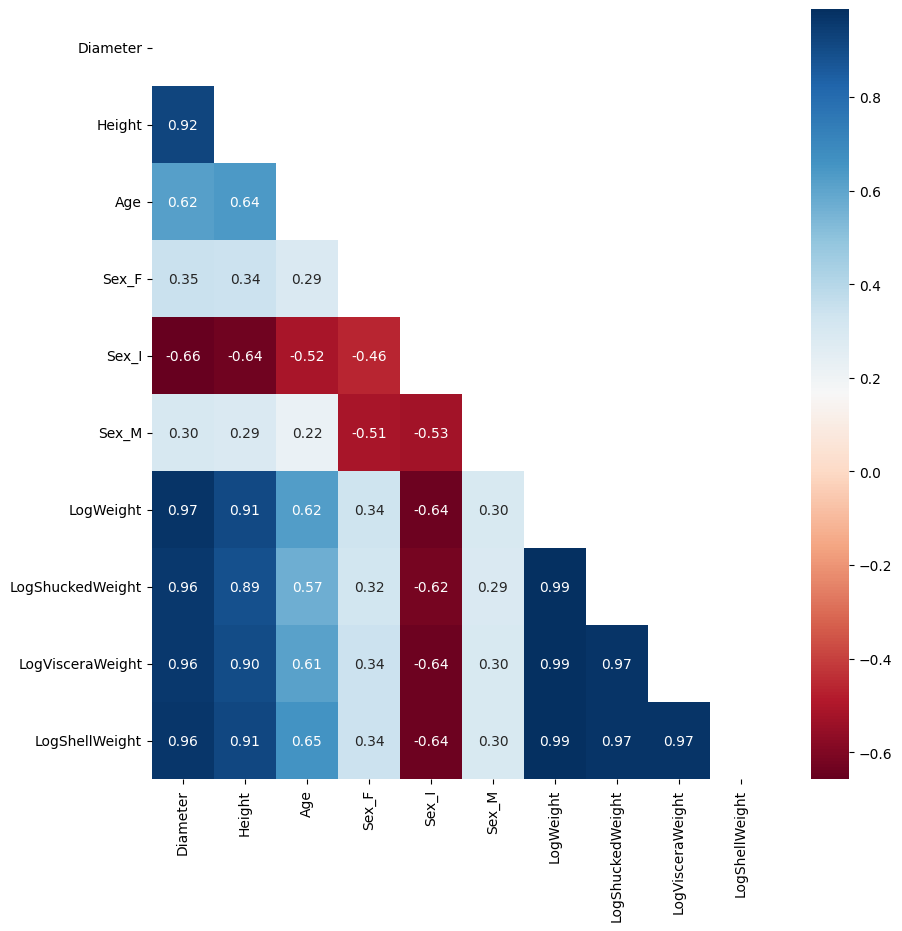

In [56]:
corr = X_train_FE.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

## Outliers

In [57]:
X_train_OutliersProcessing = pd.DataFrame(X_train)
X_train_FE_OutliersProcessing = pd.DataFrame(X_train_FE)

In [58]:
# Loop over all feature to drop observations over and below 3 standard deviations in X_train_OutliersProcessing

SD = 3 # Number of standard deviations to consider
for col in X_train_OutliersProcessing.columns[1:]:
    X_train_OutliersProcessing = X_train_OutliersProcessing[(X_train_OutliersProcessing[col] >= X_train_OutliersProcessing[col].mean() - SD * X_train_OutliersProcessing[col].std())]
    X_train_OutliersProcessing = X_train_OutliersProcessing[(X_train_OutliersProcessing[col] <= X_train_OutliersProcessing[col].mean() + SD * X_train_OutliersProcessing[col].std())]

# Feature selection

## RFECV - Recursive Feature Elimination with Cross-Validation

In [61]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=250,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=4,
    random_state=42
)

X = X_train_FE.drop(['Age'], axis=1)
y = X_train_FE['Age']


# Asegúrate de que tienes tus datos en X e y
# X = tus datos característicos
# y = tu variable objetivo

# Define un objeto RFECV (Eliminación Recursiva de Características con Validación Cruzada)
rfecv = RFECV(estimator=rf_classifier, step=1, cv=StratifiedKFold(5),
              scoring='neg_mean_squared_error', n_jobs=-1)

# Ajusta el objeto RFECV a los datos
rfecv.fit(X, y)

# Imprime el número óptimo de características
print("Optimal number of features : %d" % rfecv.n_features_)

# Guarda las características seleccionadas en una lista
selected_features = [f for f, s in zip(X.columns, rfecv.support_) if s]

print("The selected features are: ", selected_features)

In [59]:
X_train_FR_RFECV = X_train_FE[['Shell Weight', 'Sex_I', 'Volume', 'Ratio_ShuWei', 'Age']]
X_test_FR_RFECV  = X_test_FE[['Shell Weight', 'Sex_I', 'Volume', 'Ratio_ShuWei']]

KeyError: "['Shell Weight', 'Volume', 'Ratio_ShuWei'] not in index"

# Results saving

In [60]:
X_train_FR = pd.read_csv('data/X_train_FR.csv')

In [61]:
X_train_FR.head()

,Shell Weight,Sex_I,Volume,Ratio_ShuWei,Age
0,8.348928,1,0.175917,0.439335,9
1,3.401940,1,0.065335,0.434014,8
2,6.662133,0,0.151542,0.457666,9
3,14.996885,0,0.314323,0.401791,11
4,5.953395,1,0.111827,0.514303,8


In [62]:
X_train_FR = pd.concat([X_train_FR, X_train['Age']], axis=1)

In [63]:
X_train_FR.head()

,Shell Weight,Sex_I,Volume,Ratio_ShuWei,Age,Age
0,8.348928,1,0.175917,0.439335,9,9
1,3.401940,1,0.065335,0.434014,8,8
2,6.662133,0,0.151542,0.457666,9,9
3,14.996885,0,0.314323,0.401791,11,11
4,5.953395,1,0.111827,0.514303,8,8


In [64]:
# Submission to a file
## Training data
X_train.to_csv('data/X_train.csv', index=False)
X_train_FE.to_csv('data/X_train_FE.csv', index=False)
X_train_OutliersProcessing.to_csv('data/X_train_out.csv', index=False)
X_train_FE_OutliersProcessing.to_csv('data/X_train_FE_out.csv', index=False)
## Test data
X_test.to_csv('data/X_test.csv', index=False)
X_test_FE.to_csv('data/X_test_FE.csv', index=False)

# Training data with Feature reduction
## RFECV - Recursive Feature Elimination with Cross-Validation
"""X_train_FR_RFECV.to_csv('data/X_train_FR.csv', index=False)
X_test_FR_RFECV.to_csv('data/X_test_FR.csv', index=False)"""

"X_train_FR_RFECV.to_csv('data/X_train_FR.csv', index=False)\nX_test_FR_RFECV.to_csv('data/X_test_FR.csv', index=False)"